Processed Image:
 [[112  44  40  95]
 [139  89  81 126]
 [ 90  78  77  83]
 [ 66  87 101  72]]
Quantum Circuit:
             ┌─┐                                          
 q2_0: ─────┤M├──────────────────────────────────────────
            └╥┘┌─┐                                       
 q2_1: ──────╫─┤M├───────────────────────────────────────
             ║ └╥┘┌─┐                                    
 q2_2: ──────╫──╫─┤M├────────────────────────────────────
             ║  ║ └╥┘┌─┐                                 
 q2_3: ──────╫──╫──╫─┤M├─────────────────────────────────
       ┌───┐ ║  ║  ║ └╥┘                              ┌─┐
 q2_4: ┤ X ├─╫──╫──╫──╫───────────────────────────────┤M├
       └┬─┬┘ ║  ║  ║  ║                               └╥┘
 q2_5: ─┤M├──╫──╫──╫──╫────────────────────────────────╫─
        └╥┘  ║  ║  ║  ║ ┌─┐                            ║ 
 q2_6: ──╫───╫──╫──╫──╫─┤M├────────────────────────────╫─
         ║   ║  ║  ║  ║ └╥┘┌─┐                         ║ 
 q2_7: ──╫───╫──╫

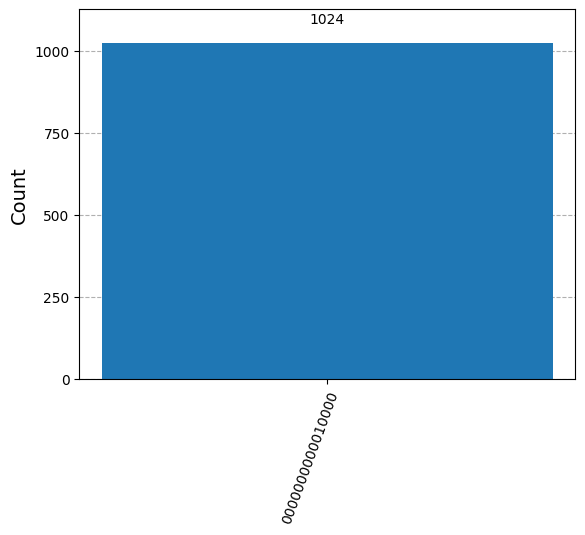

In [24]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
import numpy as np
from PIL import Image
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt  

%matplotlib inline

def load_and_preprocess_image(image_path, target_size=(4, 4)):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize(target_size)  # Resize to target dimensions
    img_array = np.array(img)  # Convert to numpy array
    return img_array

def neqr_encoding(image_array):
    # This function should create a quantum circuit based on the image_array
    num_qubits = image_array.size
    qr = QuantumRegister(num_qubits)
    cr = ClassicalRegister(num_qubits)
    qc = QuantumCircuit(qr, cr)

    for i, value in enumerate(image_array.flatten()):
        if value > 127:  
            qc.x(qr[i])

    qc.measure(qr, cr)  
    return qc

image_path = r'D:\6m_NIC\images\castleInterior.jpeg'  
image = load_and_preprocess_image(image_path, target_size=(4, 4))
print("Processed Image:\n", image)

qc = neqr_encoding(image)

print("Quantum Circuit:\n", qc)

backend = AerSimulator()
transpiled_qc = transpile(qc, backend)

result = backend.run(transpiled_qc, shots=1024).result()  # Use a reasonable number of shots

try:
    counts = result.get_counts(transpiled_qc)
    print("Quantum Circuit Output:\n", counts)
    
    plot_histogram(counts)
except Exception as e:
    print("Error fetching counts:", e)